Our methods for comparing two samples have a powerful use in the analysis of randomized controlled experiments. Since the treatment and control groups are assigned randomly in such experiements, differences in their outcomes can be compared to what would happen just due to chance if the treatment had no effect at all. If the observed differences are more marked than what we would predict as purely due to chance, we will have evidence of causation. Because of the unbiased assignment of individuals to the treatment and control groups, differences in the outcomes of the two groups can be ascribed to the treatment.

The key to the analysis of randomized controlled experiments is understanding exactly how chance enters the picture. This helps us set up clear null and alternative hypotheses. Once that's done, we can simply use the methods of the previous sections to complete the analysis.

Let's see how to do this in an example.

## Treating Chronic Back Pain: A Randomized Controlled Trial 
Low-back pain in adults can be very persistent and hard to treat. Common methods run the gamut from corticosteroids to acupuncture. A randomized controlled trial (RCT) examined the effect of using Botulinum Toxin A as a treatment. Botulinum toxin is a neurotoxic protein that causes the disease botulism; Wikipedia says that botulinum "is the most acutely lethal toxin known." There are seven types of botulinum toxin. Botulinum Toxin A is one of the types that can cause disease in humans, but it is also used in medicine to treat various diseases involving the muscles. The RCT analyzed by Foster, Clapp, and Jabbari in 2001 examined it as a treatment for low back pain.

Thirty one patients with low-back pain were randomized into treatment and control groups, with 15 in the treatment group and 16 in control. The control group was given normal saline, and the trials were run double-blind so that neither doctors nor patients knew which group they were in.

Eight weeks after the start of the study, nine of the 15 in the treatment group and two of the 16 in the control group had pain relief (according to a precise definition used by the researchers). These data are in the table bta and appear to show that the treatment has a clear benefit.

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
bta=pd.read_csv("bta.csv")
bta

,Group,Result
0,Control,1.0
1,Control,1.0
2,Control,0.0
3,Control,0.0
4,Control,0.0
5,Control,0.0
6,Control,0.0
7,Control,0.0
8,Control,0.0
9,Control,0.0


Remember that counting is the same as adding zeros and ones. The sum of 1's in the control group is the number of control group patients who had pain relief. So the average of the number of 1's is the proportion of control group patients who had pain relief.

In [3]:
average=bta.groupby('Group').mean()
average

,Result
Group,
Control,0.125
Treatment,0.600


In the treatment group, 60% of the patients had pain relief, compared to only 12.5% in the control group. None of the patients suffered any side effects.

So the indications are that botulinum toxin A did better than the saline. But the conclusion isn't yet a slam-dunk. The patients were assigned at random into the two groups, so perhaps the difference could just be due to chance?

To understand what this means, we have to consider the possibility that among the 31 patients in the study, some were simply better able to recover than others, even without any help from the treatment. What if an unusually large proportion of such patients got assigned to the treatment group, just by chance? Then even if the treatment did nothing more than the saline in the control group, the results of the treatment group might look better than those of the control group.

To account for this possibility, let's start by carefully setting up the chance model.

Potential Outcomes 
Before the patients are randomized into the two groups, our minds instinctively imagine two possible outcomes for each patient: the outcome that the patient would have if assigned to the treatment group, and the outcome that the same patient would have if assigned to the control group. These are called the two potential outcomes of the patient.

Thus there are 31 potential treatment outcomes and 31 potential control outcomes. The question is about the distributions of these two sets of 31 outcomes each. Are they the same, or are they different?

We can't answer this just yet, because we don't get to see all 31 values in each group. We just get to see a randomly selected 16 of the potential control outcomes, and the treatment outcomes of the remaining 15 patients.

Here is a good way to visualize the setting. Each patient has a two-sided ticket:

After the randomization, we get to see the right half of a randomly selected set of tickets, and the left half of the remaining group.

The table observed_outcomes collects the information about every patient's potential outcomes, leaving the unobserved half of each "ticket" blank. (It's just another way of thinking about the bta table, carrying the same information.)

In [4]:
observed_outcomes=pd.read_csv("observed_outcomes.csv")
observed_outcomes

,Group,Outcome if assigned treatment,Outcome if assigned control
0,Control,Unknown,1
1,Control,Unknown,1
2,Control,Unknown,0
3,Control,Unknown,0
4,Control,Unknown,0
5,Control,Unknown,0
6,Control,Unknown,0
7,Control,Unknown,0
8,Control,Unknown,0
9,Control,Unknown,0


### The Hypotheses 
The question is whether the treatment does anything. In terms of the table observed_outcomes, the question is whether the distribution of the 31 "treatment" values in Column 1 (including the unknown ones) is different from the distribution of the 31 "control" values in Column 2 (again including the unknown ones).

### Null Hypothesis: The distribution of all 31 potential "treatment" outcomes is the same as that of all 31 potential "control" outcomes. Botulinum toxin A does nothing different from saline; the difference in the two samples is just due to chance.

### Alternative Hypothesis: The distribution of 31 potential "treatment" outcomes is different from that of the 31 control outcomes. The treatment does something different from the control.

There are 31 observed outcomes jointly in the two groups. If the null hypothesis were true, it wouldn't matter which of those 31 outcomes were labeled "treatment" and which "control." Any random subset of 16 out of the 31 values could be called "control" and the remaining 15 "treatment".

We can simulate this. We can randomly permute the 31 values, split them into two groups of 16 and 15, and see how different the distributions in the two groups are. Since the data are zeros and ones, we can just see how different the two proportions are.

That's exactly what we did for A/B testing in the previous section. Sample A is now the control group and Sample B the treatment group. We will carry out the test below showing the details of all the steps. You should confirm that they are the same as the steps carried out for A/B testing.

### The Test Statistic 
If the two group proportions are very different from each other, we will lean towards the alternative hypothesis that the two underlying distributions are different. So our test statistic will be the distance between the two group proportions, that is, the absolute value of the difference between them.

Large values of the test statistic will favor the alternative hypothesis over the null.

Since the two group proportions were 0.6 and 0.125, the observed value of the test statistic is  ∣∣0.6−0.125∣∣=0.475 .

In [5]:
average

,Result
Group,
Control,0.125
Treatment,0.600


In [6]:
observed_proportions = average['Result']
observed_distance = np.diff(observed_proportions)
observed_distance

array([0.475])

As we have done before, we will define a function that takes the following arguments:

the name of the table of data
the column label of the numerical variable
the column label of the group labels
and returns the absolute difference between the two group proportions.

In [7]:
def distance(table, label, group_label):
    reduced = table[[label, group_label]]
    means_table = reduced.groupby(group_label).mean()
    means = means_table[label]
    return np.diff(means)

In [8]:
distance(bta, 'Result', 'Group')

array([0.475])

Predicting the Statistic Under the Null Hypothesis 
We can simulate results under the null hypothesis, to see how our test statistic should come out if the null hypothesis is true.

Generating One Value of the Statistic 
The simulation follows exactly the same process we used in the previous section. We start by randomly permuting the all group labels and then attaching the shuffled labels to the 0/1 results.

In [9]:
shuffled_labels = np.array(bta['Group'].sample(31,replace=False))
bta_with_shuffled_labels=bta.copy()
bta_with_shuffled_labels['Shuffled Label']= shuffled_labels
bta_with_shuffled_labels

,Group,Result,Shuffled Label
0,Control,1.0,Treatment
1,Control,1.0,Treatment
2,Control,0.0,Control
3,Control,0.0,Treatment
4,Control,0.0,Control
5,Control,0.0,Treatment
6,Control,0.0,Control
7,Control,0.0,Control
8,Control,0.0,Control
9,Control,0.0,Treatment


We can now find the distance between the two proportions after the group labels have been shuffled.

In [10]:
distance(bta_with_shuffled_labels, 'Result', 'Shuffled Label')

array([0.21666667])

In [11]:
distance(bta_with_shuffled_labels, 'Result', 'Group')

array([0.475])

Permutation Test 
If we shuffled the labels again, how different would the new distance be? To answer this, we will define a function that simulates one simulated value of the distance under the hypothesis of random draws from the same underlying distribution. And then we will collect 20,000 such simulated values in an array.

You can see that we are doing exactly what we did in our previous examples of the permutation test.

In [12]:
def one_simulated_distance(table, label, group_label):
    shuffled_labels =  np.array(table[group_label].sample(31,replace=False))
    shuffled_table=table.copy()
    shuffled_table['Shuffled Label']= shuffled_labels
    return distance(shuffled_table,label,'Shuffled Label')  
 
    

In [23]:
distances = np.array([])

repetitions = 2000
for i in np.arange(repetitions):
    new_distance = one_simulated_distance(bta, 'Result', 'Group')
    distances = np.append(distances, new_distance)


Conclusion of the Test 
The array distances contains 20,000 values of our test statistic simulated under the null hypothesis.

To find the P-value of the test, remember that large values of the test statistic favor the alternative hypothesis. So the empirical P-value is the proportion of simulated statistics that were equal to or larger than the observed statistic.

In [24]:
empirical_P = np.count_nonzero(distances >= observed_distance) / repetitions
empirical_P

0.009

This is a small P-value. The observed statistic, shown as the red dot below, is in the tail of the empirical histogram of the test statistic generated under the null hypothesis.

The result is statistically significant. The test favors the alternative hypothesis over the null. The evidence supports the hypothesis that the treatment is doing something.

In [25]:
print('Observed Difference:', observed_distance)
print('Empirical P-value:', round(empirical_P, 4) *100, '%')

Observed Difference: [0.475]
Empirical P-value: 0.8999999999999999 %


In [26]:
finaltable= pd.DataFrame({'Difference Between Group Means': distances})
finaltable

,Difference Between Group Means
0,0.216667
1,0.087500
2,-0.170833
3,-0.041667
4,0.087500
...,...
1995,-0.041667
1996,-0.300000
1997,-0.041667
1998,-0.300000


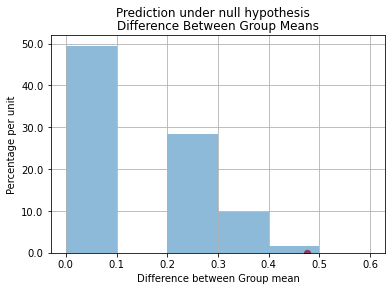

In [29]:
axarr= finaltable.hist(bins = np.arange(0, 0.7, 0.1),alpha=0.5)
for ax in axarr.flatten():
        ax.set_xlabel("Difference between Group mean")
        ax.set_ylabel("Percentage per unit")
        ax.scatter(observed_distance,0, color='red', s=40)
        pl.suptitle("Prediction under null hypothesis")
        ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f'{(x/10):.1f}'))
        #ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f'{(x/10):.1f}'))

In [28]:
print('Observed Distance', observed_distance)
print('Empirical P-value:', round(empirical_P, 4) *100, '%')

Observed Distance [0.475]
Empirical P-value: 0.8999999999999999 %
